# Uptake of carbon

Plotting a global map of carbon uptake

In [1]:
%matplotlib inline

import xarray as xr
import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


## Demonstrate how to use `intake-esm`
[Intake-esm](https://intake-esm.readthedocs.io) is a data cataloging utility that facilitates access to CMIP data. It's pretty awesome.

An `intake-esm` collection object establishes a link to a database that contains file locations and associated metadata (i.e. which experiement, model, etc. thet come from). 

### Opening a collection
First step is to open a collection by pointing to the collection definition file, which is a JSON file that conforms to the [ESM Collection Specification](https://github.com/NCAR/esm-collection-spec). 

The collection JSON files are stored locally in this repository for purposes of reproducibility---and because Cheyenne compute nodes don't have Internet access. 

The primary source for these files is the [intake-esm-datastore](https://github.com/NCAR/intake-esm-datastore) repository. Any changes made to these files should be pulled from that repo. For instance, the Pangeo cloud collection is available [here](https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json).

In [2]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28660 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28660 zstore(s)

	> 59 dcpp_init_year(s)

`intake-esm` is build on top of [pandas](https://pandas.pydata.org/pandas-docs/stable). It is possible to view the `pandas.DataFrame` as follows.

In [3]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,pr,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,prsn,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmax,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r1i1p1f1,Amon,tasmin,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/ssp370/r1i1...,NaN


It is possible to interact with the `DataFrame`; for instance, we can see what the "attributes" of the datasets are by printing the columns.

In [4]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

### Search and discovery

#### Finding unique entries
Let's query the data to see what models ("source_id"), experiments ("experiment_id") and temporal frequencies ("table_id") are available.

In [5]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

#### Searching for specific datasets

Let's find all the carbon data at annual frequency from the ocean for the `historical` and `ssp585` experiments.

In [8]:
cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Oyr', variable_id='dissic', grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1475,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1544,CMIP,CCCma,CanESM5,historical,r10i1p2f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1614,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r11i1...,NaN
1710,CMIP,CCCma,CanESM5,historical,r12i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN
1806,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r13i1...,NaN
1903,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r14i1...,NaN
1999,CMIP,CCCma,CanESM5,historical,r15i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r15i1...,NaN
2095,CMIP,CCCma,CanESM5,historical,r16i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r16i1...,NaN
2191,CMIP,CCCma,CanESM5,historical,r17i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r17i1...,NaN
2288,CMIP,CCCma,CanESM5,historical,r18i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r18i1...,NaN


It might be desirable to get more specific. For instance, we may want to select only the models that have *both* `historical` and `ssp585` data. We coud do this as follows.

In [9]:
models = set(uni_dict['source_id']['values']) # all the models

for experiment_id in ['historical', 'ssp585']:
    query = dict(experiment_id=experiment_id, table_id='Oyr', 
                 variable_id='o2', grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# for oxygen, ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
# models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['CanESM5', 'IPSL-CM6A-LR', 'MIROC-ES2L']

In [10]:
cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Oyr', 
                 variable_id='dissic', grid_label='gn', source_id=models)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1475,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1544,CMIP,CCCma,CanESM5,historical,r10i1p2f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1614,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r11i1...,NaN
1710,CMIP,CCCma,CanESM5,historical,r12i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN
1806,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r13i1...,NaN
1903,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r14i1...,NaN
1999,CMIP,CCCma,CanESM5,historical,r15i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r15i1...,NaN
2095,CMIP,CCCma,CanESM5,historical,r16i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r16i1...,NaN
2191,CMIP,CCCma,CanESM5,historical,r17i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r17i1...,NaN
2288,CMIP,CCCma,CanESM5,historical,r18i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r18i1...,NaN


### Loading data

`intake-esm` enables loading data directly into an [xarray.Dataset](http://xarray.pydata.org/en/stable/api.html#dataset).

Note that data on the cloud are in 
[zarr](https://zarr.readthedocs.io/en/stable/) format and data on 
[glade](https://www2.cisl.ucar.edu/resources/storage-and-file-systems/glade-file-spaces) are stored as 
[netCDF](https://www.unidata.ucar.edu/software/netcdf/) files. This is opaque to the user.

`intake-esm` has rules for aggegating datasets; these rules are defined in the collection-specification file.

In [16]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {'time' : 20}, 'decode_times': False})

`dset_dict` is a dictionary of `xarray.Dataset`'s; its keys are constructed to refer to compatible groups.

In [17]:
dset_dict.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Oyr.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Oyr.gn', 'ScenarioMIP.CCCma.CanESM5.ssp585.Oyr.gn', 'ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.Oyr.gn'])

We can access a particular dataset as follows.

In [18]:
dsC = dset_dict['CMIP.CCCma.CanESM5.historical.Oyr.gn']

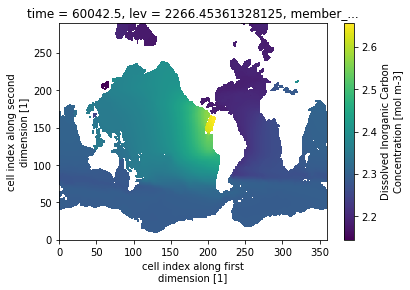

In [68]:
dsC.dissic.isel(member_id=1,time=164,lev=30).plot()

In [35]:
cat_fx = col.search(experiment_id=['historical', 'ssp585'], source_id=models, table_id='Ofx', grid_label='gn')
cat_fx.df
cat_fx.df.drop_duplicates(subset=['source_id', 'variable_id'], inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
cat_fx.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1435,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1436,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,deptho,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1437,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1438,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,thkcello,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
6515,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
6516,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Ofx,basin,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
9232,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN
9233,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Ofx,deptho,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN
9234,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Ofx,sftof,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN


In [39]:
dset_dict = cat_fx.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 3 group(s)


In [41]:
ds_fx = dset_dict['CMIP.CCCma.CanESM5.historical.Ofx.gn']

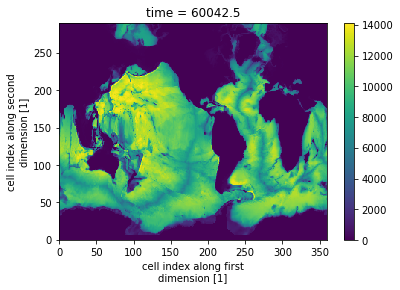

In [70]:
(dsC.dissic.isel(member_id=1,time=164)*ds_fx.thkcello.isel(member_id=0)).sum('lev').plot()

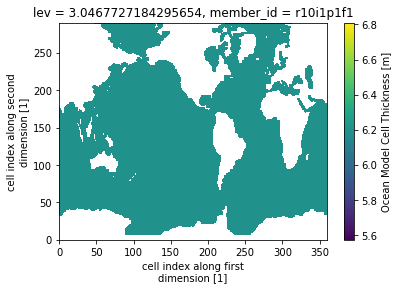

In [65]:
#import matplotlib.pyplot as plt
ds_fx.thkcello.isel(member_id=0,lev=0).plot()